### 230319 하은서 필수과제1

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [113]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [96]:
df.info()
# 수치형 데이터: survived, pclass, age, sibsp, parch, fare
# 이 때 survived, pclass, sibsp, parch 데이터는 다른 데이터의 결과값과 비슷함
# 따라서 age, fare 데이터만 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [114]:
# 결측치 확인
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [98]:
# age 결측값 177, fare 결측값 0 개를 확인할 수 있다.

### age IQR 계산하기

<Axes: >

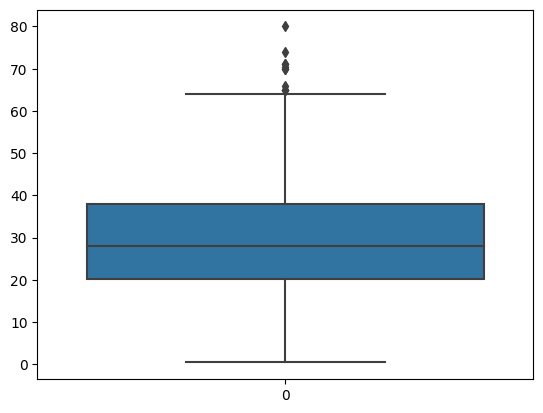

In [99]:
sns.boxplot(df['age'])

In [100]:
# 이상치 제거 전
age_p25 = df['age'].quantile(0.25)
age_p75 = df['age'].quantile(0.75)


print(age_p25)
print(age_p75)
print(df['age'].mean())

20.125
38.0
29.69911764705882


In [101]:
# boxplot으로 확인한 결과
# age가 80은 이상치로 보기 어렵다
# 하지만 이상치를 제거 한다면 평균나이는 높아질 것으로 예상된다.

In [102]:
iqr = age_p75 - age_p25
iqr

17.875

In [103]:
# 아래 하한선 p25 - 1.5 * iqr
# 위 상한선 p75 + 1.5 * iqr

print(age_p25-1.5*iqr)
print(age_p75+1.5*iqr)

-6.6875
64.8125


In [104]:
# 이상치 결측치로 대체
df['age'] = np.where(((df['age']<-6.6875) | (df['age']>64.8125)), np.nan, df['age'])

In [105]:
df.dropna(inplace=True)

In [109]:
df['age'].mean()

34.646440677966105

### fare IQR 계산하기

<Axes: >

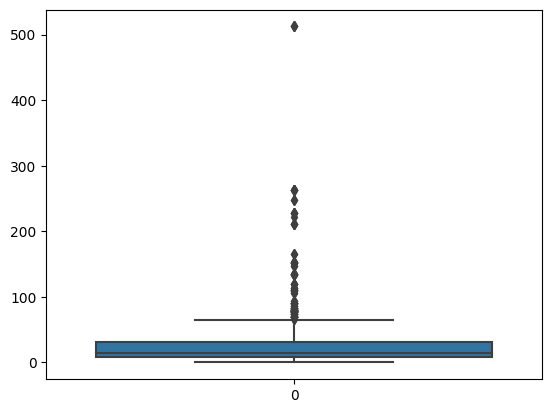

In [116]:
sns.boxplot(df['fare'])

In [117]:
# fare 통계량, 이상치, 평균 확인
fare_p25 = df['fare'].quantile(0.25)
fare_p75 = df['fare'].quantile(0.75)


print(fare_p25)
print(fare_p75)
print(df['fare'].mean())

7.9104
31.0
32.204207968574636


In [118]:
iqr = fare_p75 - fare_p25
iqr

23.0896

In [119]:
# 아래 하한선 p25 - 1.5 * iqr
# 위 상한선 p75 + 1.5 * iqr

print(fare_p25-1.5*iqr)
print(fare_p75+1.5*iqr)

-26.724
65.6344


In [120]:
# 이상치 결측치로 대체
df['fare'] = np.where((df['fare']<-26.724) | (df['fare']>65.6344), np.nan, df['fare'])

In [123]:
df['fare'].mean()
# 제거 전보다 평균이 작아진 것을 확인 할 수 있음

17.82209070967742

<Axes: >

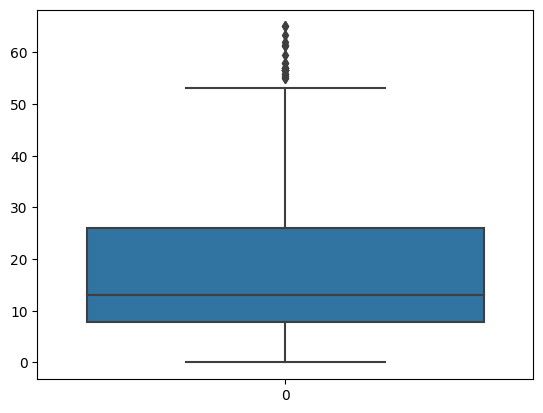

In [122]:
sns.boxplot(df['fare'])